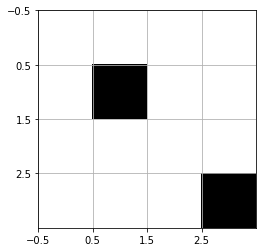

In [24]:
'''game of life'''
import matplotlib.pyplot as plt
import numpy as np
l=4
a=np.diag([0,1,0,1])#diag-array是一个一维数组时，输出以一维数组为对角线的矩阵；二维数组时，输出矩阵的对角线元素
fig,ax=plt.subplots(figsize=(4,4))
ax.set_xlim([-0.5,3.5])#xlim-设定x轴的范围
ax.set_ylim([-0.5,3.5])
ax.set_xticks(np.arange(-0.5,3.5,1))
ax.set_yticks(np.arange(-0.5,3.5,1))
ax.invert_yaxis()#翻转坐标轴,使y轴坐标向下
ax.grid(True)#加灰色网格
ax.imshow(1-a,cmap='gray')
plt.show()

In [29]:
#迭代器
class lifematrices:
    tus=[(i,j) for i in [-1,0,1] for j in [-1,0,1]]
    def __init__(self, ini_matrix):#定义一个初始矩阵
        self.matrix=ini_matrix.copy()
        self.shape=ini_matrix.shape
    def check(self,i,j):
        m,n=self.shape
        res=sum([self.matrix[(i+k)%m,(j+l)%n] for (k,l) in lifematrices.tus])
        res=res-self.matrix[i,j]
        return res
    def __next__(self):
        x=self.matrix
        y=self.matrix.copy()
        m,n=self.shape
        for i in range(m):
            for j in range(n):
                neighbor=self.check(i,j)
                on_site=self.matrix[i,j]
                if on_site==0 and neighbor==3:
                    y[i,j]=1
                    if on_site==1 and (neighbor<2 or neighbor>3):
                        y[i,j]=0
                        
        self.matrix=y
        return x
        
    
    

In [35]:
a=np.zeros((11,11),dtype='int8')
a[1,5]=1
a[2,5]=1
a[3,5]=1
a[7,5]=1
a[8,5]=1
a[9,5]=1

a[5,1]=1
a[5,2]=1
a[5,3]=1
a[5,7]=1
a[5,8]=1
a[5,9]=1

b=np.zeros((20,20),dtype='int8')
b[3,4]=1
b[4,5]=1
b[5,3]=1
b[5,4]=1
b[5,5]=1
print(a)
print(' ')
print(b)

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
 
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

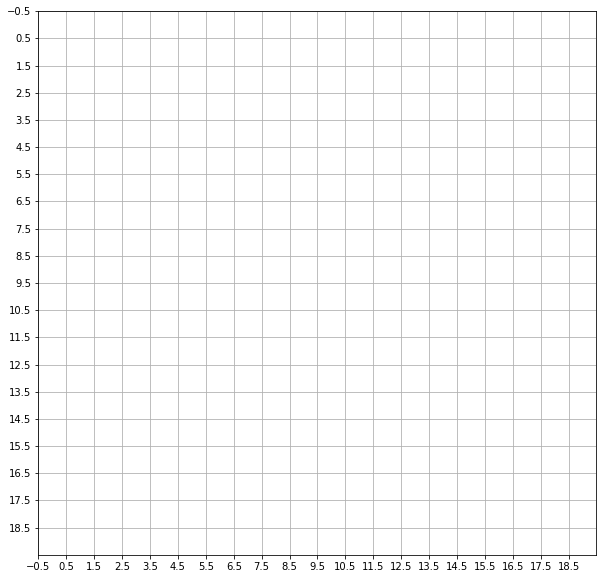

In [43]:
#测试
test=lifematrices(b)
from matplotlib.animation import FuncAnimation
m,n=b.shape
fig,ax=plt.subplots(figsize=(10*m/n,10))
ax.set_xlim([-0.5,m-0.5])#xlim-设定x轴的范围
ax.set_ylim([-0.5,n-0.5])
ax.set_xticks(np.arange(-0.5,m-0.5,1))
ax.set_yticks(np.arange(-0.5,n-0.5,1))
ax.invert_yaxis()#翻转坐标轴,使y轴坐标向下
ax.grid(True)#加灰色网格
def ini():
    return ax.imshow(1-next(test),cmap='gray')
def update(frame):
    return ax.imshow(1-next(test),cmap='gray')

#制作动画
#ani=FuncAnimation(fig,update,frames=np.arange(100),init_func=ini)

#ani.save('animation.gif',writer=writer)

In [40]:
#,ImageMagickWriter
#writer=ImageMagickWriter(fps=5)

In [44]:
import numpy as np
import matplotlib.pyplot as plt


def lorenz96(initial_state, nsteps):
    """
    Perform iterations of the Lorenz 96 update.
    Parameters
    ----------
    initial_state : array_like or list
        Initial state of lattice in an array of floats.
    nsteps : int
        Number of steps of Lorenz 96 to perform.
    Returns
    -------
    numpy.ndarray
         Final state of lattice in array of floats
    >>> x = lorenz96([8.0, 8.0, 8.0], 1)
    >>> print(x)
    array([8.0, 8.0, 8.0])
    """

    # write your code here to replace this return statement
    def output_new_expand_list(ori_data):
        len_ori_data = len(ori_data)
        expand_data = np.zeros(len_ori_data + 3)
        expand_data[:2] = ori_data[-2:]
        expand_data[-1] = ori_data[0]
        expand_data[2:-1] = ori_data
        return expand_data

    if type(initial_state) == list:
        initial_state = np.array(initial_state)
    expand_data = output_new_expand_list(initial_state)
    for i in range(nsteps):
        new_data = (1 / 101) * \
                   (100 * expand_data[2:-1]
                    + (expand_data[:-3] -
                       expand_data[3:]) *
                    expand_data[1:-2] + 8)
        expand_data = output_new_expand_list(new_data)
    return new_data


def life(initial_state, nsteps):
    """
    Perform iterations of Conway’s Game of Life.
    Parameters
    ----------
    initial_state : array_like or list of lists
        Initial 2d state of grid in an array of booleans.
    nsteps : int
        Number of steps of Life to perform.
    Returns
    -------
    numpy.ndarray
         Final state of grid in array of booleans
    """
    changing_state_shape = initial_state.shape
    changing_state_shape = \
        (changing_state_shape[0] + 2, changing_state_shape[1] + 2)
    changing_state = np.zeros(changing_state_shape, dtype=np.bool)
    changing_state[1:-1, 1:-1] = initial_state
    for i in range(nsteps):
        changing_state = changing_state.astype(int)
        neighber_condition = \
            changing_state[1:-1, :-2] + \
            changing_state[1:-1, 2:] + \
            changing_state[2:, 2:] + \
            changing_state[2:, :-2] + \
            changing_state[:-2, 2:] + \
            changing_state[:-2, :-2] + \
            changing_state[2:, 1:-1] + \
            changing_state[:-2, 1:-1]
        changing_state = changing_state.astype(np.bool)
        changing_state[1:-1, 1:-1] = \
            (changing_state[1:-1, 1:-1]
             & ((neighber_condition == 2) |
                (neighber_condition == 3))) \
            | ((changing_state[1:-1, 1:-1] ==
                False) & (neighber_condition == 3))
    # write your code here to replace return statement
    return changing_state[1:-1, 1:-1]


def life_periodic(initial_state, nsteps):
    """
    Perform iterations of Conway's Game of Life on a doubly periodic mesh.

    Parameters
    ----------
    initial_state : array_like or list of lists
        Initial 2d state of grid in an array of booleans.
    nsteps : int
        Number of steps of Life to perform.

    Returns
    -------

    numpy.ndarray
         Final state of grid in array of booleans
    """

    # write your code here to replace this return statement
    def get_nearby_condition(ori_state):
        nearby_condition = \
            ori_state[1:-1, :-2] + \
            ori_state[1:-1, 2:] + \
            ori_state[2:, 2:] + \
            ori_state[2:, :-2] + \
            ori_state[:-2, 2:] + \
            ori_state[:-2, :-2] + \
            ori_state[2:, 1:-1] + \
            ori_state[:-2, 1:-1]
        return nearby_condition

    def updata_status(ori_state, new_inside):
        ori_state[1:-1, 1:-1] = new_inside
        ori_state[0, 1:-1] = ori_state[-2, 1:-1]
        ori_state[-1, 1:-1] = ori_state[1, 1:-1]
        ori_state[1:-1, 0] = ori_state[1:-1, -2]
        ori_state[1:-1, -1] = ori_state[1:-1, 1]
        ori_state[0, 0] = ori_state[-2, -2]
        ori_state[0, -1] = ori_state[-2, 1]
        ori_state[-1, -1] = ori_state[1, 1]
        ori_state[-1, 0] = ori_state[1, -2]
        return ori_state

    changing_state_shape = initial_state.shape
    changing_state_shape = (changing_state_shape[0]
                            + 2, changing_state_shape[1] + 2)
    changing_state = np.zeros(changing_state_shape, dtype=bool)
    changing_state = updata_status(changing_state, initial_state)
    for i in range(nsteps):
        changing_state = changing_state.astype(int)
        neighber_condition \
            = get_nearby_condition(changing_state)
        changing_state = \
            changing_state.astype(bool)
        new_inside = \
            (changing_state[1:-1, 1:-1] &
             ((neighber_condition == 2) | (neighber_condition == 3))) \
            | ((changing_state[1:-1, 1:-1] == False)
               & (neighber_condition == 3))
        changing_state = updata_status(changing_state, new_inside)

    return changing_state[1:-1, 1:-1]


def life2colour(initial_state, nsteps):
    """
    Perform iterations of Conway's Game of Life on a doubly periodic mesh.

    Parameters
    ----------
    initial_state : array_like or list of lists
        Initial 2d state of grid in an array ints with value -1, 0, or 1.
        Values of -1 or 1 represent "on" cells of both colours. Zero
        values are "off".
    nsteps : int
        Number of steps of Life to perform.

    Returns
    -------

    numpy.ndarray
        Final state of grid in array of ints of value -1, 0, or 1.
    """

    # write your code here to replace this return statement
    def sum_surrounding_color_status(changing_state):
        neighber_condition = \
            changing_state[1:-1, :-2] + \
            changing_state[1:-1, 2:] + \
            changing_state[2:, 2:] + \
            changing_state[2:, :-2] + \
            changing_state[:-2, 2:] + \
            changing_state[:-2, :-2] + \
            changing_state[2:, 1:-1] + \
            changing_state[:-2, 1:-1]
        return neighber_condition

    def output_red_and_blue_mask(initial_state):
        mask_red = initial_state == -1
        mask_blue = initial_state == 1
        return mask_red, mask_blue

    def updata_status(ori_state, new_inside):
        ori_state[1:-1, 1:-1] = new_inside
        ori_state[0, 1:-1] = ori_state[-2, 1:-1]
        ori_state[-1, 1:-1] = ori_state[1, 1:-1]
        ori_state[1:-1, 0] = ori_state[1:-1, -2]
        ori_state[1:-1, -1] = ori_state[1:-1, 1]
        ori_state[0, 0] = ori_state[-2, -2]
        ori_state[0, -1] = ori_state[-2, 1]
        ori_state[-1, -1] = ori_state[1, 1]
        ori_state[-1, 0] = ori_state[1, -2]
        return ori_state

    inside_shape = initial_state.shape
    changing_state_shape = (inside_shape[0] + 2, inside_shape[1] + 2)
    changing_state_zero = \
        np.zeros(changing_state_shape)
    changing_state_all = \
        updata_status(changing_state_zero, initial_state)
    changing_state_red, changing_state_blue = \
        output_red_and_blue_mask(changing_state_all)

    for i in range(nsteps):
        changing_state_blue = changing_state_blue.astype(int)
        changing_state_red = changing_state_red.astype(int)

        neighber_state_blue = sum_surrounding_color_status(changing_state_blue)
        neighber_state_red = sum_surrounding_color_status(changing_state_red)

        neighber_state_all = neighber_state_blue + neighber_state_red

        changing_state_blue = \
            changing_state_blue.astype(np.bool)
        changing_state_red = \
            changing_state_red.astype(np.bool)
        changing_state_blue[1:-1, 1:-1] = \
            (changing_state_blue[1:-1, 1:-1] & (
                    (neighber_state_all == 2) |
                    (neighber_state_all == 3))) | \
            ((changing_state_all[1:-1, 1:-1] == 0) & (
                    neighber_state_all == 3) &
             (neighber_state_blue > neighber_state_red))
        changing_state_red[1:-1, 1:-1] = \
            (changing_state_red[1:-1, 1:-1] & (
                    (neighber_state_all == 2) |
                    (neighber_state_all == 3))) | \
            ((changing_state_all[1:-1, 1:-1] == 0)
             & (neighber_state_all == 3) &
             (neighber_state_blue < neighber_state_red))

        tem_result = \
            changing_state_red[1:-1, 1:-1].astype(int) * (-1) \
            + changing_state_blue[1:-1, 1:-1].astype(int) * 1
        changing_state_all = updata_status(changing_state_all, tem_result)
        changing_state_red, changing_state_blue \
            = output_red_and_blue_mask(changing_state_all)

    red = changing_state_red[1:-1, 1:-1].astype(int)
    blue = changing_state_blue[1:-1, 1:-1].astype(int)
    result = red * (-1) + blue * 1
    return result


def lifepent(initial_state, nsteps):
    """
    Perform iterations of Conway's Game of Life on
    a pentagonal tessellation.

    Parameters
    ----------
    initial_state : array_like or list of lists
        Initial state of grid of pentagons.
    nsteps : int
        Number of steps of Life to perform.

    Returns
    -------

    numpy.ndarray
         Final state of tessellation.
    """

    # write your code here to replace return statement
    initial_state_shape = initial_state.shape
    changing_state_shape = \
        (initial_state_shape[0] + 2, initial_state_shape[1] + 2)
    changing_state = \
        np.zeros(changing_state_shape, dtype=bool)
    changing_state[1:-1, 1:-1] = initial_state
    for i in range(nsteps):
        changing_state = changing_state.astype(int)
        neighber_condition = \
            changing_state[1:-1, :-2] + \
            changing_state[1:-1, 2:] + \
            changing_state[2:, 2:] + \
            changing_state[2:, :-2] + \
            changing_state[:-2, 2:] + \
            changing_state[:-2, :-2] + \
            changing_state[2:, 1:-1] + \
            changing_state[:-2, 1:-1]
        neighber_condition[::2, ::2] = \
            neighber_condition[::2, ::2] - changing_state[2::2, 2::2]
        neighber_condition[1::2, 1::2] = \
            neighber_condition[1::2, 1::2] - changing_state[1:-2:2, 1:-2:2]
        neighber_condition[::2, 1::2] = \
            neighber_condition[::2, 1::2] - changing_state[0:-2:2, 3::2]
        neighber_condition[1::2, ::2] = \
            neighber_condition[1::2, ::2] - changing_state[3::2, 0:-2:2]
        changing_state = changing_state.astype(bool)
        changing_state[1:-1, 1:-1] = \
            ((changing_state[1:-1, 1:-1] == True) & (
                    (neighber_condition == 2) | (neighber_condition == 3))) \
            | ((changing_state[1:-1, 1:-1] == False) & (
                    (neighber_condition == 3) |
                    (neighber_condition == 4) | (neighber_condition == 6)))
    return changing_state[1:-1, 1:-1]


# Remaining routines are for plotting

def plot_lorenz96(data, label=None):
    """
    Plot 1d array on a circle

    Parameters
    ----------
    data: arraylike
        values to be plotted
    label:
        optional label for legend.


    """

    offset = 8

    data = np.asarray(data)
    theta = 2 * np.pi * np.arange(len(data)) / len(data)

    vector = np.empty((len(data), 2))
    vector[:, 0] = (data + offset) * np.sin(theta)
    vector[:, 1] = (data + offset) * np.cos(theta)

    theta = np.linspace(0, 2 * np.pi)

    rings = np.arange(int(np.floor(min(data)) - 1),
                      int(np.ceil(max(data))) + 2)
    for ring in rings:
        plt.plot((ring + offset) * np.cos(theta),
                 (ring + offset) * np.sin(theta), 'k:')

    fig_ax = plt.gca()
    fig_ax.spines['left'].set_position(('data', 0.0))
    fig_ax.spines['bottom'].set_position(('data', 0.0))
    fig_ax.spines['right'].set_color('none')
    fig_ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks(rings + offset, rings)
    plt.fill(vector[:, 0], vector[:, 1],
             label=label, fill=False)
    plt.scatter(vector[:, 0], vector[:, 1], 20)


def plot_array(data, show_axis=False,
               cmap=plt.cm.get_cmap('seismic'), **kwargs):
    """Plot a 1D/2D array in an appropriate format.

    Mostly just a naive wrapper around pcolormesh.

    Parameters
    ----------

    data : array_like
        array to plot
    show_axis: bool, optional
        show axis numbers if true
    cmap : pyplot.colormap or str
        colormap

    Other Parameters
    ----------------

    **kwargs
        Additional arguments passed straight to pyplot.pcolormesh
    """
    plt.pcolormesh(1 * data[-1::-1, :], edgecolor='y',
                   vmin=-2, vmax=2, cmap=cmap, **kwargs)

    plt.axis('equal')
    if show_axis:
        plt.axis('on')
    else:
        plt.axis('off')


def plot_pent(x_0, y_0, theta_0, clr=0):
    """
    Plot a pentagram

    Parameters
    ----------
    x_0: float
        x coordinate of centre of the pentegram
    y_0: float
        y coordinate of centre of the pentegram
    theta_0: float
        angle of pentegram (in radians)
    """
    colours = ['w', 'r']
    s_1 = 1 / np.sqrt(3)
    s_2 = np.sqrt(1 / 2)

    theta = np.deg2rad(theta_0) + np.deg2rad([30, 90, 165, 240, 315, 30])
    r_pent = np.array([s_1, s_1, s_2, s_1, s_2, s_1])

    x_pent = x_0 + r_pent * np.sin(-theta)
    y_pent = y_0 + r_pent * np.cos(-theta)

    plt.fill(x_pent, y_pent, ec='k', fc=colours[clr])


def plot_pents(data):
    """
    Plot pentagrams in Cairo tesselation, coloured by value
    Parameters
    ----------
    data: arraylike
        integer array of values
    """
    plt.axis('off')
    plt.axis('equal')
    data = np.asarray(data).T
    for row in range(data.shape[0]):
        for col in range(data.shape[1]):
            x_c = \
                (row + 1) // 2 \
                + (row // 2) * np.cos(np.pi / 6) \
                - (col // 2) * np.sin(np.pi / 6)
            y_c = \
                (col + 1) // 2 + (col // 2) * np.cos(np.pi / 6) \
                + (row // 2) * np.sin(np.pi / 6)
            theta = (90 * (row % 2) * ((col + 1) % 2)
                     - 90 * (row % 2) * (col % 2) - 90 * (col % 2))
            clr = data[row, data.shape[1] - 1 - col]
            plot_pent(x_c, y_c, theta, clr=clr)
        

In [47]:
import numpy as np
import matplotlib.pyplot as plt
    def output_new_expand_list(ori_data):
        len_ori_data = len(ori_data)
        expand_data = np.zeros(len_ori_data + 3)
        expand_data[:2] = ori_data[-2:]
        expand_data[-1] = ori_data[0]
        expand_data[2:-1] = ori_data
        return expand_data

    if type(initial_state) == list:
        initial_state = np.array(initial_state)
    expand_data = output_new_expand_list(initial_state)
    for i in range(nsteps):
        new_data = (1 / 101) * \
                   (100 * expand_data[2:-1]
                    + (expand_data[:-3] -
                       expand_data[3:]) *
                    expand_data[1:-2] + 8)
        expand_data = output_new_expand_list(new_data)
    return new_data


IndentationError: unexpected indent (<ipython-input-47-8d90d1656c53>, line 3)